In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

[Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

# Exploratory Data Analysis

## Data Understanding

In [2]:
data = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
data.sample(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5362,ham,I'm in inside office..still filling forms.don ...,NaN,NaN,NaN
5375,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Preparation

In [5]:
to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data.drop(columns=to_drop, inplace=True)

In [6]:
data.rename(columns={"v1": "label", "v2" : "text"}, inplace=True)

In [7]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
data.loc[data.duplicated()]

,label,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [9]:
data.drop_duplicates(inplace=True)

# Model Creation

<Axes: xlabel='label'>

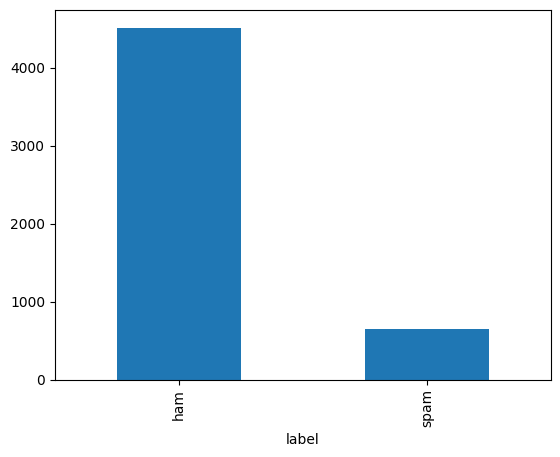

In [10]:
data['label'].value_counts().plot(kind='bar')

Imbalanced Dataset needs to be resampled

In [11]:
label_map = {'ham': 0, 'spam': 1}
data['label'] = data['label'].map(label_map)

In [12]:
from sklearn.utils import resample
majority = data[(data['label']==0.0)] 
minority = data[(data['label']==1.0)] 

df_minority_upsampled = resample(minority, 
                                 replace=True,
                                 n_samples=data['label'].value_counts()[0], 
                                 random_state=42)
data = pd.concat([df_minority_upsampled, majority])

<Axes: xlabel='label'>

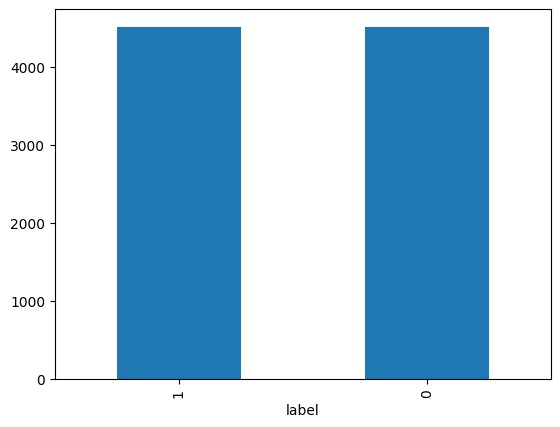

In [13]:
data['label'].value_counts().plot(kind='bar')

In [14]:
x = data['text']
y = data['label']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3)

In [16]:
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [17]:
vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [18]:
x_train_features = vectorizer.fit_transform(x_train)
x_test_features = vectorizer.transform(x_test)

In [19]:
model = LogisticRegression()
model.fit(x_train_features, y_train)

LogisticRegression()

In [20]:
predict_train_data=model.predict(x_train_features)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data = accuracy_score(y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9965397923875432


In [22]:
predict_test_data=model.predict(x_test_features)
accuracy_test_data=accuracy_score(y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9894853348090759


In [25]:
new_mail=["Lithium-ion insights + greener computing + China’s future"]
new_data_features=vectorizer.transform(new_mail)
prediction=model.predict(new_data_features)

if(prediction[0]==1):
    print("Spam Mail")
else:
    print("Ham Mail")

Ham Mail
